In [1]:
# This code is written by Shad Ahammed, 
# Purpose for this kernel is to make exploratory data analysis and prediction modelling of Bike Sharing Dataset
# The dataset was taken from UCI Machine Learning Repository
# The dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system
# with the corresponding weather and seasonal information.
# Only the hourly data is considered


# Importing the libraries

import numpy as np
import statistics as stat
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

from scipy import stats
from numpy import median
from statsmodels.graphics.gofplots import qqplot

from sklearn import model_selection
from sklearn.metrics import mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor

In [21]:
# Reading data from the local storage

filename = 'C:\\Users\\lenovo\\Desktop\\Bike-Sharing-Dataset\\hour.csv' 
data = pd.read_csv(filename)
data.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [3]:
# Checking existence of null value in the dataset

data.isnull().sum()

# No null value is present in the dataset

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
# Changing column name for a nice precise reading

data.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'yr':'year',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

In [5]:
# Checking data type for each column

data.dtypes

instant         int64
dteday         object
season          int64
year            int64
month           int64
hour            int64
holiday         int64
weekday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
# Some columns need to be deleted because they are ambiguous and add no importance to the analysis

data = data.drop(['instant','dteday'], axis=1)

# Some data types need to be changed from numerical to categorical

data['year'] = data.year.astype('category')
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')

# Confirming the converted datatype
data.dtypes

season        category
year          category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

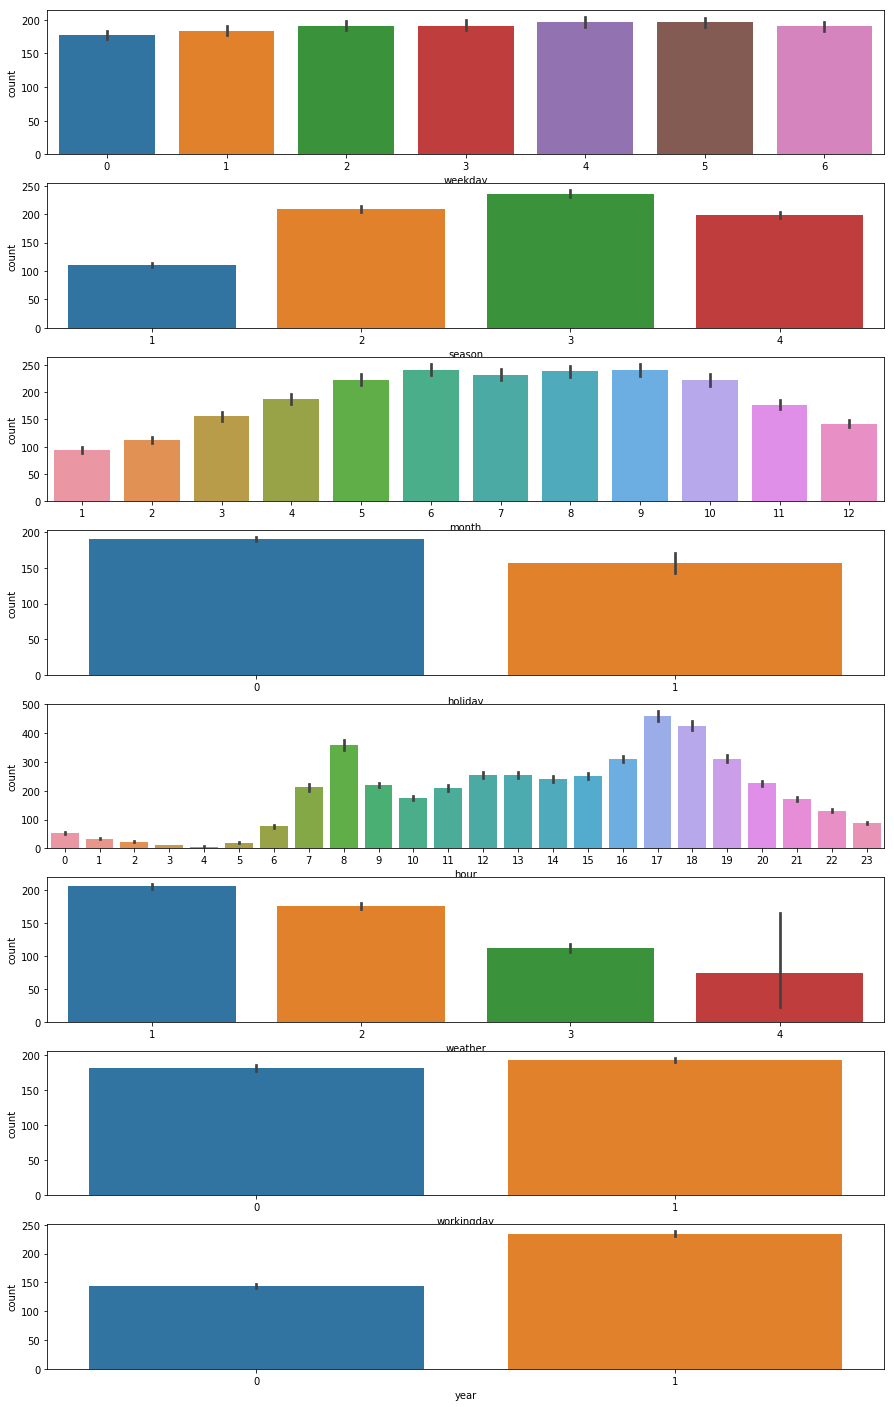

In [7]:
## Exploratory Data Analysis


# Analyzing the change in bike sharing pattern('count' variable in dataset) with categorical variables

fig,[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8] = plt.subplots(nrows=8, figsize=(15,25))
sn.barplot(x = data['weekday'], y = data['count'],ax = ax1)
sn.barplot(x = data['season'], y = data['count'],ax = ax2)
sn.barplot(x = data['month'], y = data['count'],ax = ax3)
sn.barplot(x = data['holiday'], y = data['count'],ax = ax4)
sn.barplot(x = data['hour'], y = data['count'],ax = ax5)
sn.barplot(x = data['weather'], y = data['count'],ax = ax6)
sn.barplot(x = data['workingday'], y = data['count'],ax = ax7)
sn.barplot(x = data['year'], y = data['count'],ax = ax8)

# It is evident that each of the above categorical variable has impacts on 'count' variable

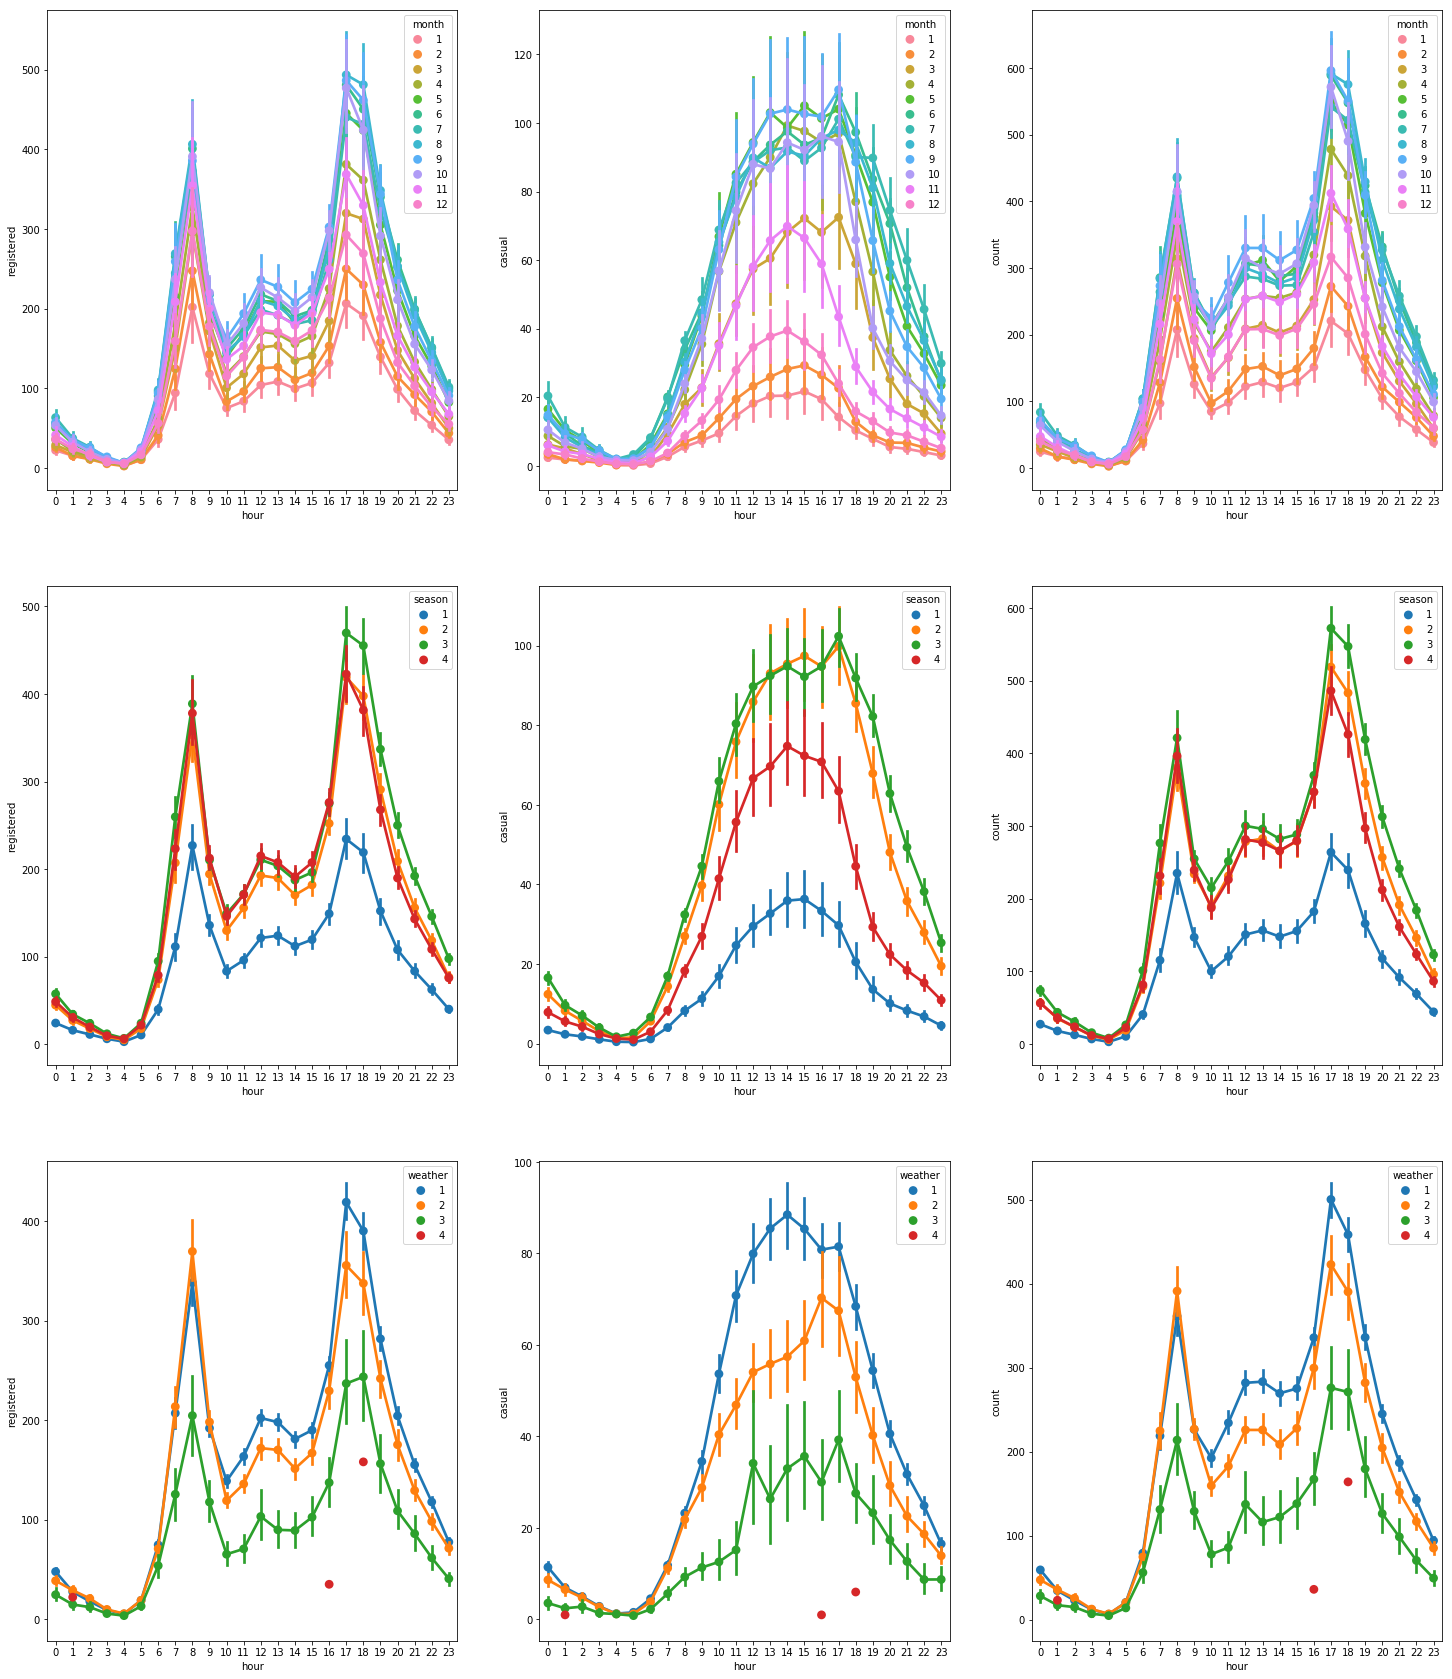

In [8]:
# Total bike users(count) is sum of registered and casual users. Need to analyze how they vary individually with hour
# The variation is observed in different circumstances to check how those impact the bike users

fig,axes = plt.subplots(nrows = 3,ncols = 3, figsize=(25,30))

sn.pointplot(x = 'hour', y = 'registered', hue = 'month',data  = data,ax = axes[0][0])
sn.pointplot(x = 'hour', y = 'casual', hue = 'month', data  = data,ax = axes[0][1])
sn.pointplot(x = 'hour', y = 'count', hue = 'month', size = 7, data  = data,ax = axes[0][2])

sn.pointplot(x = 'hour', y = 'registered', hue = 'season',data  = data,ax = axes[1][0])
sn.pointplot(x = 'hour', y = 'casual', hue = 'season', data  = data,ax = axes[1][1])
sn.pointplot(x = 'hour', y = 'count', hue = 'season', size = 7, data  = data,ax = axes[1][2])

sn.pointplot(x = 'hour', y = 'registered', hue = 'weather',data  = data,ax = axes[2][0])
sn.pointplot(x = 'hour', y = 'casual', hue = 'weather', data  = data,ax = axes[2][1])
sn.pointplot(x = 'hour', y = 'count', hue = 'weather', size = 7, data  = data,ax = axes[2][2])

# It is evident from the patterns that number of registered users is dominant in the count of total users

[Text(0.5,1,'Relation between Windspeed and total count')]

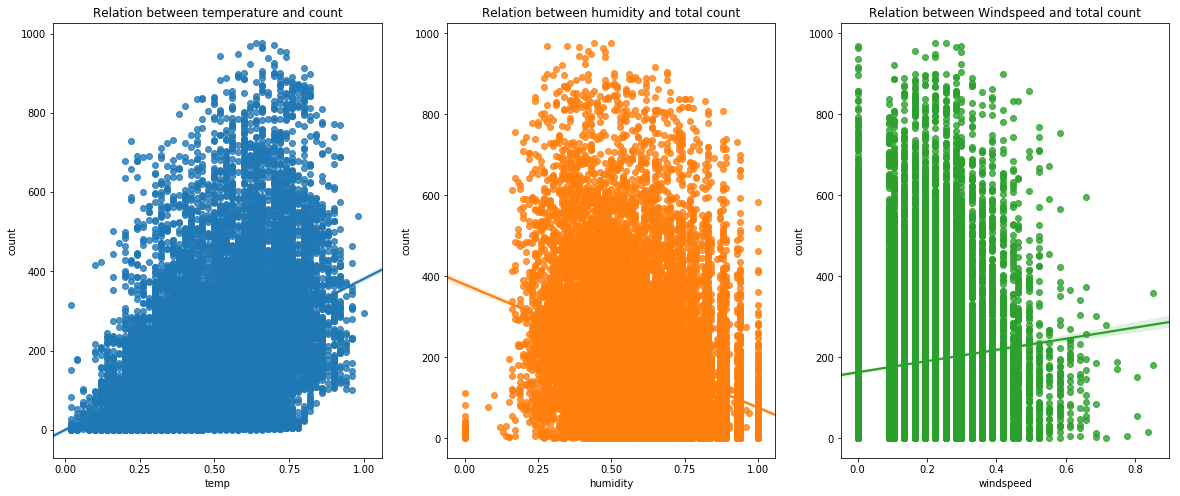

In [9]:
# Analyzing the change in bike sharing pattern with numerical variables
# Regression plot is used to verify if a pattern can be observed between 'count' and numerical variables

fig,[ax1,ax2,ax3] = plt.subplots(ncols = 3, figsize = (20,8))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sn.regplot(x = 'temp', y = 'count',data = data,ax = ax1)
ax1.set(title="Relation between temperature and count")
sn.regplot(x = 'humidity', y = 'count',data = data,ax = ax2)
ax2.set(title="Relation between humidity and total count")
sn.regplot(x = 'windspeed', y = 'count',data = data,ax = ax3)
ax3.set(title="Relation between Windspeed and total count")

Text(0.5,0.98,'Relation between Windspeed and total count')

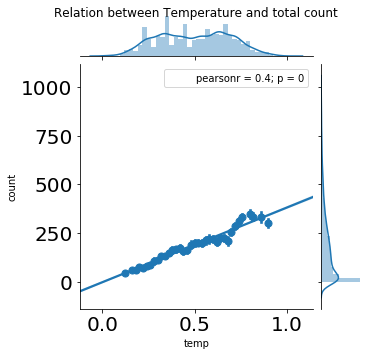

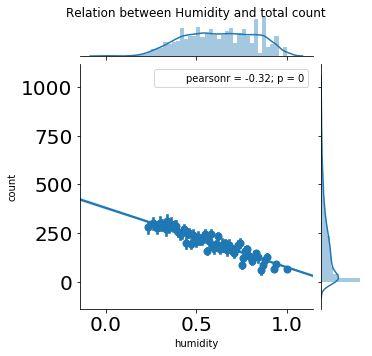

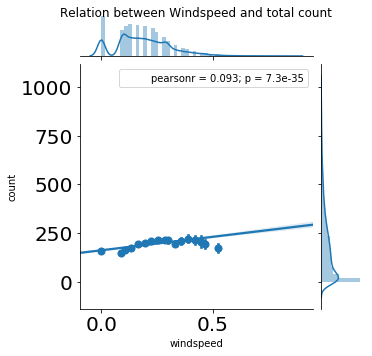

In [10]:
# From the regression plot, it is not very clear how the data fit with the regression line
# To understand the central tendecy, bins can be used  in regression plot

ax1 = sn.jointplot(x = 'temp', y = 'count',data = data,kind = 'reg', x_bins = 100,x_estimator=np.mean,size = 5)
ax1.fig.suptitle('Relation between Temperature and total count')
ax2 = sn.jointplot(x = 'humidity', y = 'count',data = data,kind = 'reg', x_bins = 100,x_estimator=np.mean,size = 5)
ax2.fig.suptitle('Relation between Humidity and total count')
ax3 = sn.jointplot(x = 'windspeed', y = 'count',data = data,kind = 'reg', x_bins = 100,x_estimator=np.mean,size = 5)
ax3.fig.suptitle('Relation between Windspeed and total count')

# From the plot it is evident there are strong relationship betweek temperature and humidity with 'count' variable
# It's also evident that windspeed has no significant effect on 'count'

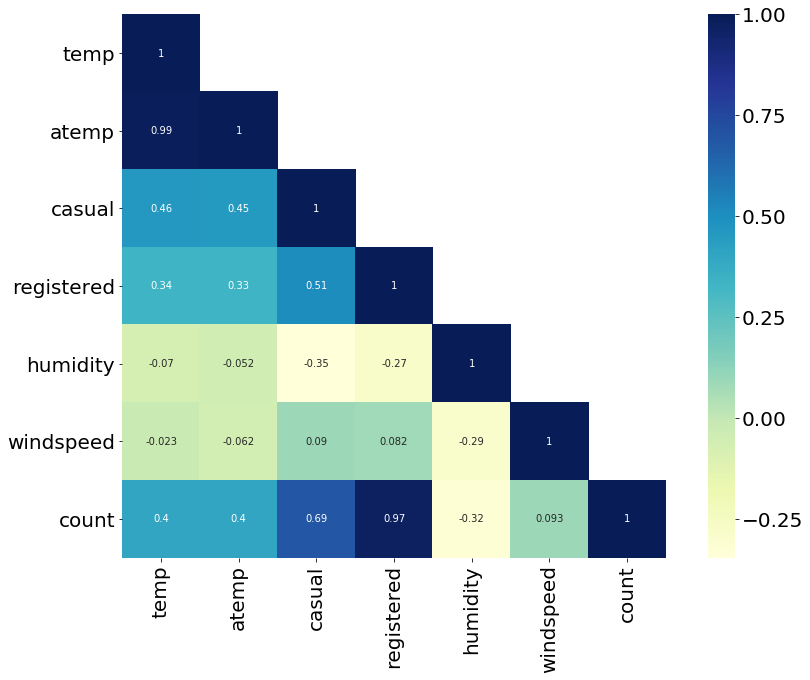

In [11]:
# To see how variables are connected with each other, data correlation can be checked 

data_corr = data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()
mask = np.array(data_corr)
mask[np.tril_indices_from(mask)] = False
fig = plt.subplots(figsize=(15,10))
sn.heatmap(data_corr, mask=mask, vmax=1, square=True, annot=True,cmap="YlGnBu")

# It is evident that temp and atemp variables are highly correlated
# temp has positive correlation and humidity has negative correlation with 'count'
# Again it can be observed that windspeed has little correlation with count

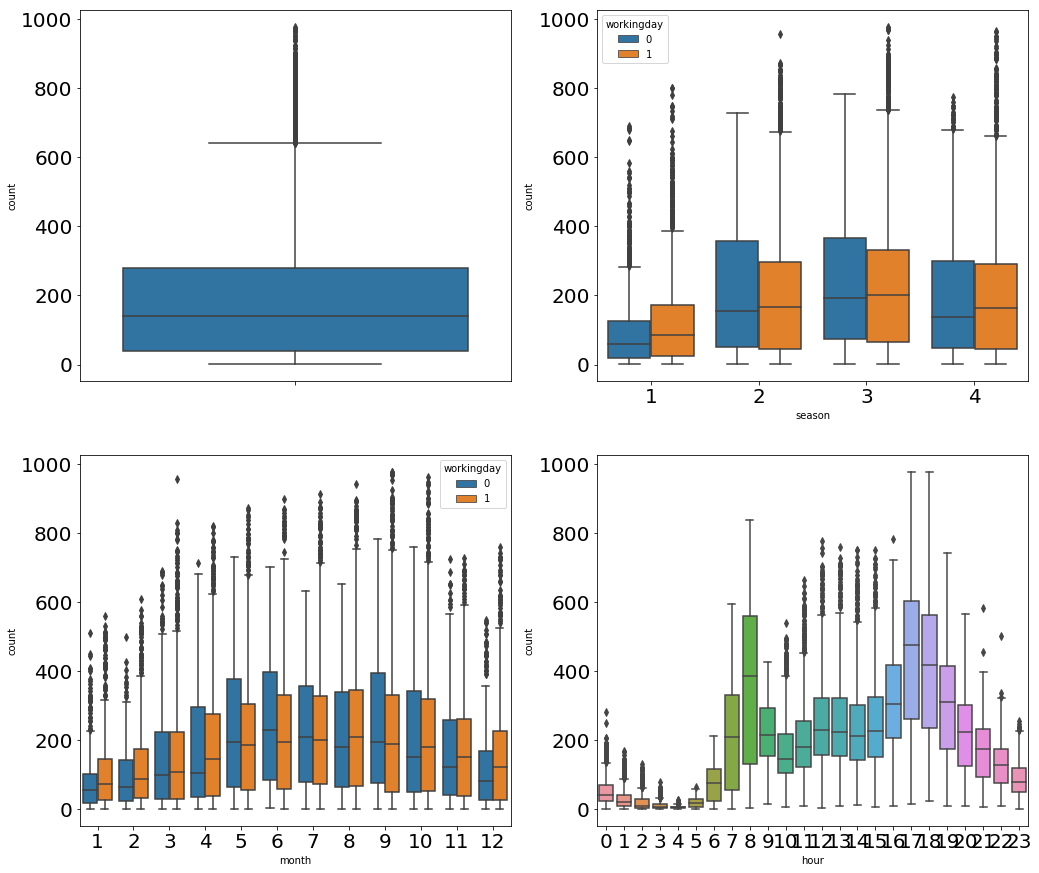

In [12]:
# Checking the outliers with boxplot

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(17,15))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

sn.boxplot(data=data,y="count",ax=axes[0][0])
sn.boxplot(data=data,y="count",x="season",hue = "workingday",ax=axes[0][1])
sn.boxplot(data=data,y="count",x="month",hue = "workingday",ax=axes[1][0])
sn.boxplot(data=data,y="count",x="hour",ax=axes[1][1])

[Text(0.5,1,'Q-Q plot of Count')]

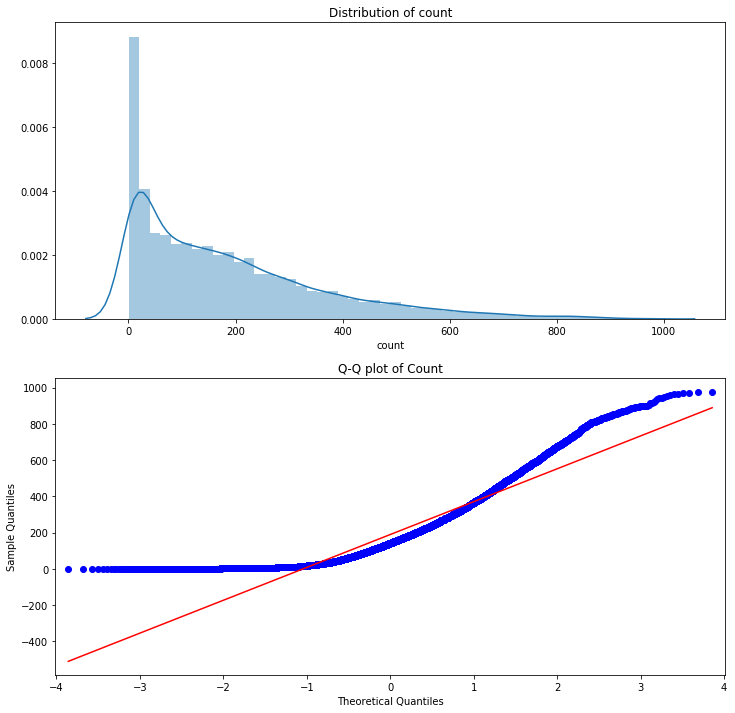

In [13]:
# To check the skewness of distribution for 'count' variable, Q-Q plot can be drawn
# Q-Q plot can also verify whether a normal distribution is possible

fig, (ax1,ax2) = plt.subplots(nrows=2, figsize=(12,12))
sn.distplot(data['count'], ax=ax1)
ax1.set(title="Distribution of count")
qqplot(data['count'], line='s', ax=ax2)
ax2.set(title="Q-Q plot of Count")

# It is evident that the distribution is not normal as the quantile plot does not fit with the straight line

In [14]:
# 'count' variable is the decomposition of 'casual' and 'registered variable'. These 2 variables can be deleted
# 'atemp' and 'temp' variables are similar almost. Can get rid of these
# 'windspeed' has not much correlation with 'count'. Can skip it too

data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

In [15]:
# Numbers in the categorical variable are non-binary which can impact wrongly the prediction model
# One hot encoding is used to convert those variables in binary by creating dummy data
# To avoid multicolinearity, the first variable in the dummydata is dropped

data_dummy = data

def dummify_dataset(dataframe, col):
    dummy_column = pd.get_dummies(dataframe[col], prefix = col, drop_first = True)
    new_data = pd.concat([dataframe,dummy_column],axis = 1)
    new_data = new_data.drop([col], axis=1)
    return new_data

dcol = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather','year']

for i in range(0,8):
    data_dummy = dummify_dataset(data_dummy,dcol[i])
    

In [16]:
# Training and test data is created by splitting the main data. 33% of test data is considered

y = data_dummy['count']
X = data_dummy.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.33,
                                                   random_state=42)

In [17]:
# Comparing performance of the regression models

models = [LinearRegression(),
          AdaBoostRegressor(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

# A function is wrtten to find out the cross validation score based on mean absolute error

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    mean_dev_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    Scores= pd.DataFrame({'Mean deviation':[np.mean(mean_dev_scores)],'R Square':[np.mean(r2_scores)]})
    print(Scores)
    
for model in models:
    test_algorithms(model)

   Mean deviation  R Square
0      -76.039848  0.684892
   Mean deviation  R Square
0     -121.512939  0.396347
   Mean deviation  R Square
0      -76.032388  0.684843
   Mean deviation  R Square
0       -72.93645  0.670301
   Mean deviation  R Square
0      -83.972287  0.607995
   Mean deviation  R Square
0       -45.74359  0.826789
   Mean deviation  R Square
0      -33.031633  0.913331
   Mean deviation  R Square
0      -59.230302  0.799304
   Mean deviation  R Square
0      -37.142827  0.898546
   Mean deviation  R Square
0      -37.273627  0.894002


In [18]:
# It is evident that the ExtraTreeRegressor() has the lowest error rating
# To find out the best parameters from a list, a function 'GridSearchCV' from Scikit library is used 

parameters={'n_estimators': (50,100,500),
        'max_features': (20,40,50),
        'min_samples_leaf': (1,5,10),
        'min_samples_split': (5,10,20)}

clf = GridSearchCV(ExtraTreesRegressor(), parameters,scoring = 'r2')
clf.fit(X_train,y_train)

print(clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

# The r2 score is very reasonable for this dataset which has such huge number of outliers

0.921435888402
{'max_features': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features=40, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=5,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)


[Text(0.5,1,'Comparison between the actual vs prediction')]

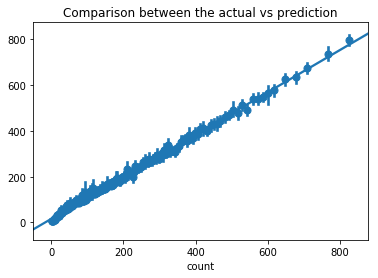

In [22]:
## Performance of the prediction model

# 'count' variables for test data is predicted with the chosen model and parameters

clf = ExtraTreesRegressor(max_features= 40, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 500)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# A regression plot can be drawn between actual and predicted data to understand the performance of the model
# Bins are used to make the pattern more meaningful

ax = sn.regplot(y_test,y_pred,x_bins = 200)
ax.set(title = "Comparison between the actual vs prediction")

[Text(0.5,1,'Comparison between the actual vs residual')]

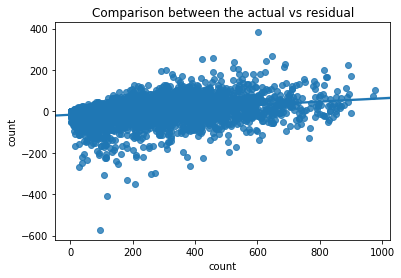

In [34]:
# Another regression plot to understand the error residuals from actual test data

y_res = y_test - y_pred
ax = sn.regplot(y_test,y_res)
ax.set(title = "Comparison between the actual vs residual")

# From the plot it is visible that the deviations from actual test data are not very high and restricted in a limit
# It is another proof for the preciseness of the prediction model